# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




In [12]:
N = 25
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
target_col = cols[N % 7]
print(target_col)

Time_on_Social_Media


In [13]:
import pandas as pd
df = pd.read_csv('teen_phone_addiction_dataset.csv')
data = df[target_col]
print(data)

0       3.6
1       1.1
2       0.3
3       3.1
4       2.6
       ... 
2995    2.7
2996    3.1
2997    2.4
2998    1.7
2999    0.0
Name: Time_on_Social_Media, Length: 3000, dtype: float64


**I. Рассчитать характеристики, построить графики**

In [14]:
mean = data.mean()
var = data.var()
mode = data.mode()[0]
median = data.median()
quantiles = data.quantile([0.25, 0.5, 0.75])
kurtosis = data.kurtosis()
skewness = data.skew()
iqr = quantiles[0.75] - quantiles[0.25]


print("Характеристики данных:")
print(f"1. Среднее: {mean:.4f}")
print(f"2. Дисперсия: {var:.4f}")
print(f"3. Мода: {mode:.4f}")
print(f"4. Медиана: {median:.4f}")
print(f"5. Квантили (0.25, 0.5, 0.75): {quantiles.values}")
print(f"6. Эксцесс: {kurtosis:.4f}")
print(f"7. Асимметрия: {skewness:.4f}")
print(f"8. Интерквартильный размах: {iqr:.4f}")

Характеристики данных:
1. Среднее: 2.4992
2. Дисперсия: 0.9765
3. Мода: 2.7000
4. Медиана: 2.5000
5. Квантили (0.25, 0.5, 0.75): [1.8 2.5 3.2]
6. Эксцесс: -0.2132
7. Асимметрия: 0.0670
8. Интерквартильный размах: 1.4000


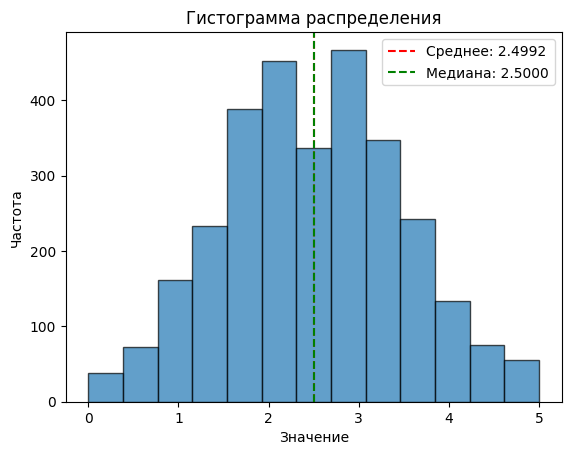

In [15]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(1, 1)

ax1.hist(data, bins=2+int(np.log2(len(data))), alpha=0.7, edgecolor='black')
ax1.axvline(mean, color='red', linestyle='--', label=f'Среднее: {mean:.4f}')
ax1.axvline(median, color='green', linestyle='--', label=f'Медиана: {median:.4f}')
ax1.set_title('Гистограмма распределения')
ax1.set_xlabel('Значение')
ax1.set_ylabel('Частота')
ax1.legend()

Text(0, 0.5, 'F(x)')

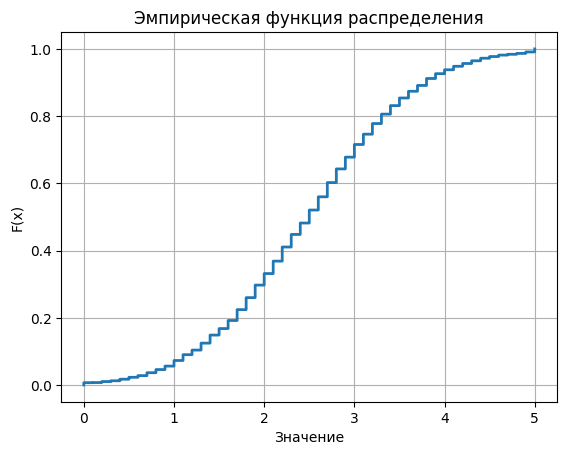

In [16]:
fig, ax1 = plt.subplots(1, 1)

sorted = np.sort(data)
y = np.arange(1, len(sorted) + 1) / len(sorted)
ax1.step(sorted, y, where='post', linewidth=2)
ax1.grid(True)
ax1.set_title('Эмпирическая функция распределения')
ax1.set_xlabel('Значение')
ax1.set_ylabel('F(x)')

Распределение похоже на мультимодальное, приблизительно симметричное (легкая правая ассиметрия).

**II. Проверка на нормальность**

**Критерий хи-квадрат**


In [ ]:
import numpy as np
from scipy.stats import norm, chi2

def chi_square_test(data, bins='sturges', alpha=0.05, min_exp=5, eps=1e-6):
    x = np.asarray(data.dropna() if hasattr(data, 'dropna') else data, dtype=float)
    n = x.size
    mu = x.mean()
    sigma = x.std(ddof=1)

    k = int(1 + 3.322 * np.log10(n)) if bins == 'sturges' else int(bins)
    probs = np.linspace(eps, 1 - eps, k + 1)
    edges = norm.ppf(probs, loc=mu, scale=sigma)

    observed, _ = np.histogram(x, bins=edges)
    p = np.diff(norm.cdf(edges, loc=mu, scale=sigma))
    expected = n * p

    new_obs, new_exp, merged_edges = [], [], [edges[0]]
    acc_o, acc_e = 0, 0.0
    for o, e, right in zip(observed, expected, edges[1:]):
        acc_o += int(o)
        acc_e += float(e)
        if acc_e >= min_exp:
            new_obs.append(acc_o); new_exp.append(acc_e); merged_edges.append(right)
            acc_o, acc_e = 0, 0.0
    if acc_e > 0:
        if new_obs:
            new_obs[-1] += acc_o; new_exp[-1] += acc_e; merged_edges[-1] = edges[-1]
        else:
            new_obs.append(acc_o); new_exp.append(acc_e); merged_edges.append(edges[-1])

    obs = np.asarray(new_obs, float)
    exp = np.asarray(new_exp, float)

    chi2_stat = float(((obs - exp) ** 2 / exp).sum())
    m = len(exp)
    df = max(1, m - 1 - 2)
    p_value = float(chi2.sf(chi2_stat, df))
    print(p_value)
    return p_value < alpha

In [ ]:
 
chi2_test_result = chi_square_test(data)
print('Отвергаем нормальность:', chi2_test_result)

6.288892830893094e-13
Отвергаем нормальность: True


**Критерий ассиметрии и эксцесса**

In [44]:
from scipy.stats import normaltest
_, p_val = normaltest(data)
print( 'Отвергаем нормальность:', p_val < 0.05)

Отвергаем нормальность: True


По обоим критериям отвергаем нулевую гипотезу

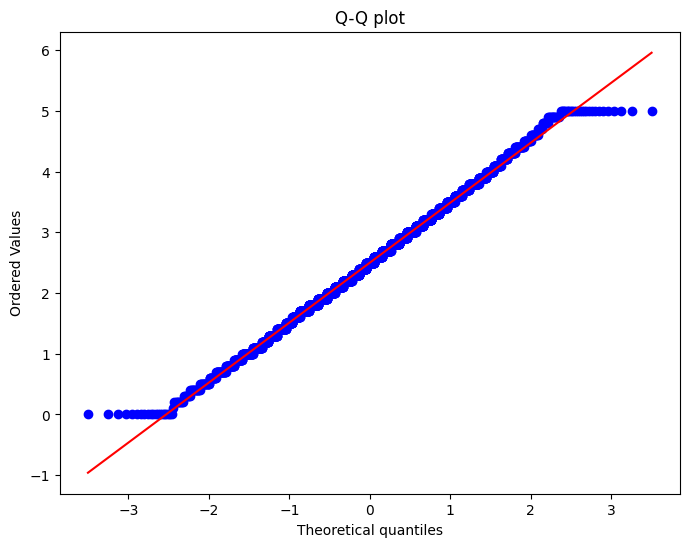

In [46]:
from scipy.stats import probplot
plt.figure(figsize=(8, 6))
probplot(data, dist="norm", plot=plt)
plt.title('Q-Q plot')
plt.show()

**III. Попытка привести к нормальному распределению**

In [59]:
data_transformed =  pd.Series(boxcox(np.log1p( xw), lmbda=None)[0], index=xw.index)

mean_transformed = data_transformed.mean()
var_transformed = data_transformed.var()
mode_transformed = data_transformed.mode()[0]
median_transformed = data_transformed.median()
quantiles_transformed = data_transformed.quantile([0.25, 0.5, 0.75])
kurtosis_transformed = data_transformed.kurtosis()
skewness_transformed = data_transformed.skew()
iqr_transformed = quantiles_transformed[0.75] - quantiles_transformed[0.25]


print("Характеристики данных:")
print(f"1. Среднее: {mean_transformed:.4f}")
print(f"2. Дисперсия: {var_transformed:.4f}")
print(f"3. Мода: {mode_transformed:.4f}")
print(f"4. Медиана: {median_transformed:.4f}")
print(f"5. Квантили (0.25, 0.5, 0.75): {quantiles_transformed.values}")
print(f"6. Эксцесс: {kurtosis_transformed:.4f}")
print(f"7. Асимметрия: {skewness_transformed:.4f}")
print(f"8. Интерквартильный размах: {iqr_transformed:.4f}")

Характеристики данных:
1. Среднее: 0.2611
2. Дисперсия: 0.1092
3. Мода: 0.3442
4. Медиана: 0.2769
5. Квантили (0.25, 0.5, 0.75): [0.02995675 0.27694204 0.50588339]
6. Эксцесс: -0.3769
7. Асимметрия: -0.1321
8. Интерквартильный размах: 0.4759


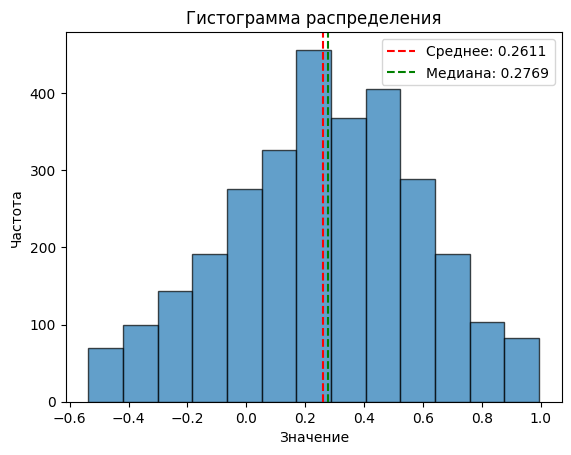

In [60]:
fig, ax1 = plt.subplots(1, 1)

ax1.hist(data_transformed, bins=2+int(np.log2(len(data_transformed))), alpha=0.7, edgecolor='black')
ax1.axvline(mean_transformed, color='red', linestyle='--', label=f'Среднее: {mean_transformed:.4f}')
ax1.axvline(median_transformed, color='green', linestyle='--', label=f'Медиана: {median_transformed:.4f}')
ax1.set_title('Гистограмма распределения')
ax1.set_xlabel('Значение')
ax1.set_ylabel('Частота')
ax1.legend()

Text(0, 0.5, 'F(x)')

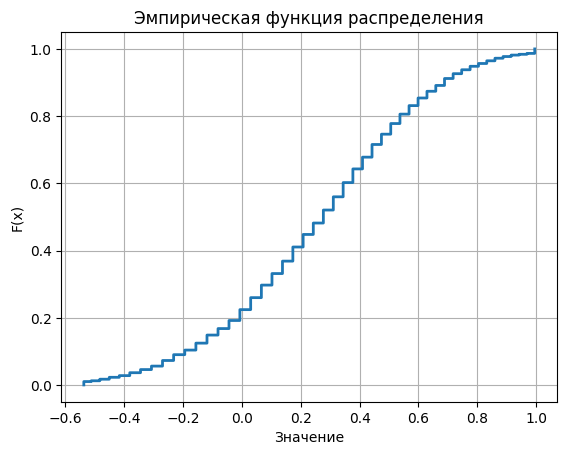

In [61]:
fig, ax1 = plt.subplots(1, 1)

sorted = np.sort(data_transformed)
y = np.arange(1, len(sorted) + 1) / len(sorted)
ax1.step(sorted, y, where='post', linewidth=2)
ax1.grid(True)
ax1.set_title('Эмпирическая функция распределения')
ax1.set_xlabel('Значение')
ax1.set_ylabel('F(x)')

Распределение стало унимодальным, но чуть менее симметричным

In [62]:
 
chi2_test_result = chi_square_test(data_transformed)
print('Отвергаем нормальность, хи-квадрат:', chi2_test_result)
from scipy.stats import normaltest
_, p_val = normaltest(data)
print( 'Отвергаем нормальность, ассиметрии и эксцесса:', p_val < 0.05)

7.060167951268263e-06
Отвергаем нормальность, хи-квадрат: True
Отвергаем нормальность, ассиметрии и эксцесса: True


Нормализовать не получилось

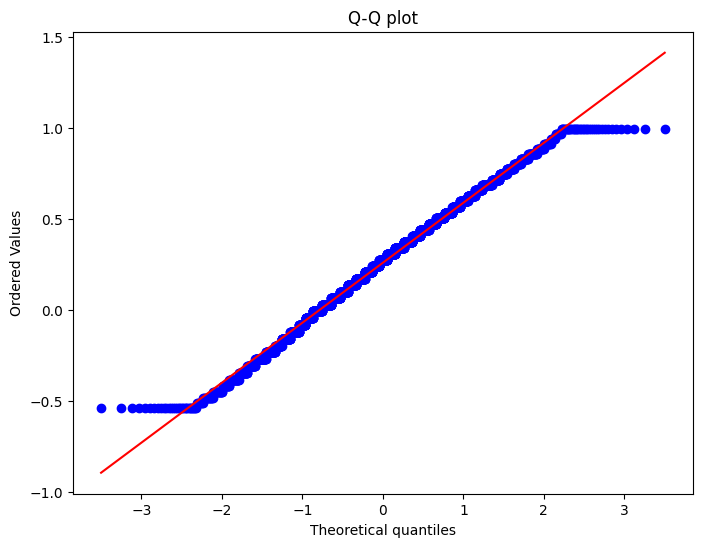

In [63]:
from scipy.stats import probplot
plt.figure(figsize=(8, 6))
probplot(data_transformed, dist="norm", plot=plt)
plt.title('Q-Q plot')
plt.show()

**IV. Группировка по оценкам в школе**

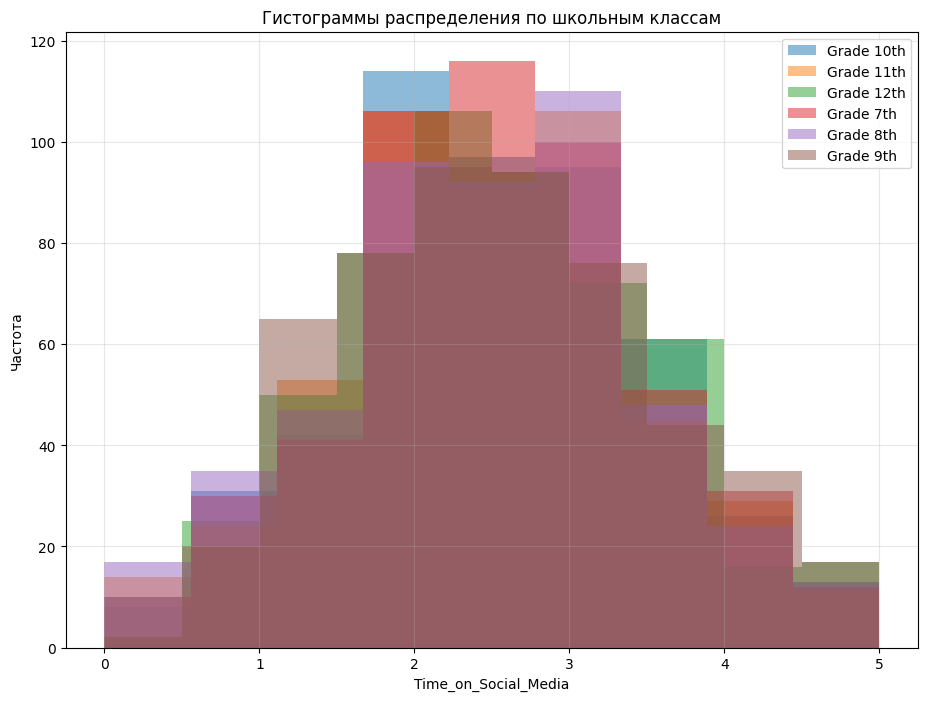

Статистики по группам:
                mean     var  count
School_Grade                       
10th          2.5240  0.9227    487
11th          2.4879  0.9459    479
12th          2.4639  1.0140    529
7th           2.5400  0.9196    497
8th           2.4699  1.0304    482
9th           2.5105  1.0260    526


In [64]:
groups = df.groupby("School_Grade")

plt.figure(figsize=(11, 8))
for grade, subset in groups:
    k = 1 + int(np.log2(len(subset))) 
    plt.hist(subset[target_col], bins=k, alpha=0.5, label=f"Grade {grade}")

plt.xlabel(target_col)
plt.ylabel("Частота")
plt.title("Гистограммы распределения по школьным классам")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

stats_by_grade = groups[target_col].agg(['mean', 'var', 'count']).round(4)
print("Статистики по группам:")
print(stats_by_grade)

Распределение в группах более-менее одинаковое, так что данные пришли их похожих распределений. Из интересного: самое высокое среднее время в соцсетях у семиклассников, и у них же наименьшая дисперсия, из чего можно сделать вывод, что в 7 классе дети проводят больше всего времени в соцсетях.